# Задание 2. Свёрточная нейронная сеть

## Шаг 1. Визуализация данных.

(60000, 28, 28)


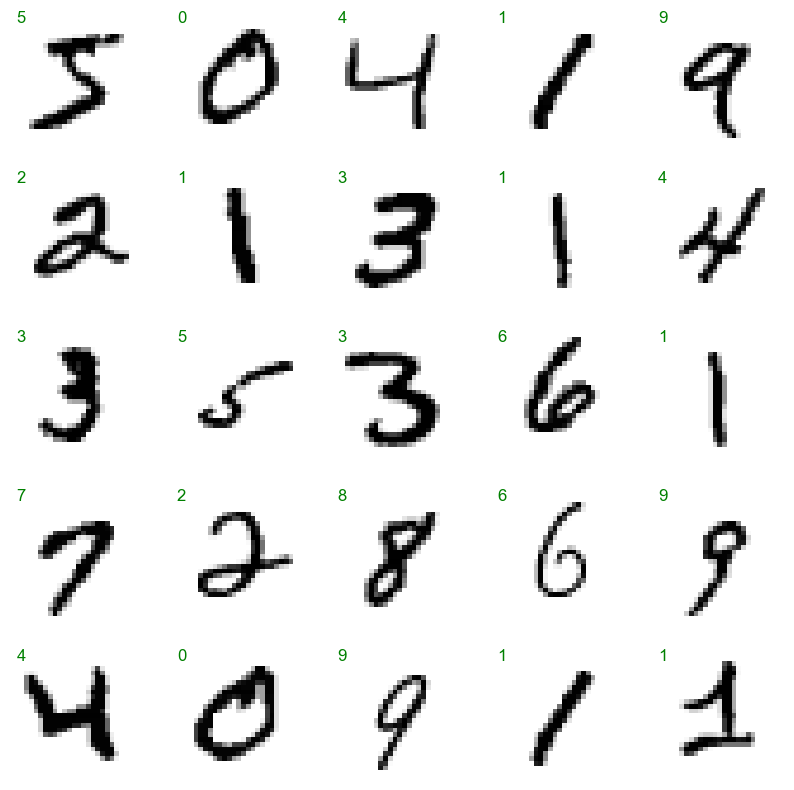

In [1]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape)

fig, axes = plt.subplots(5, 5, figsize=(10, 10),
                         subplot_kw={'xticks': [], 'yticks': []},
                         gridspec_kw=dict(hspace=0.2, wspace=0.2))

for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.9, str(y_train[i]), transform=ax.transAxes, color='green',
            fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

plt.show()


## Шаг 2. Нормализация данных.

In [2]:
x_train = x_train.astype("float32")
y_train = y_train.astype("float32")
x_test = x_test.astype("float32")
y_test = y_test.astype("float32")

x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

x_train /= 255.0
x_test /= 255.0

## Шаг 3. Векторизация данных.

In [3]:
from tensorflow.keras.utils import to_categorical

num_classes = 10
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

## Шаг 4. Строим модель

### Входной слой.

In [4]:
from tensorflow.keras import layers, models, utils
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Activation

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape [1:] ) )


### Первый свёрточный блок

Делаем изображение меньше в два раза и отключаем 1/4 нейронов, чтобы избежать переобучения.

In [5]:
model.add(Activation('relu'))
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

### Второй свёрточный блок

Делаем изображение меньше в два раза и отключаем 1/4 нейронов, чтобы избежать переобучения.

In [6]:
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation ('relu'))
model.add(Conv2D(64, (3,3)))
model.add(Activation ('relu' ))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout (0.25))

### Классификатор
Создаём 512 нейронов, отключаем 1/2, чтобы избежать переобучения, делаем выходной слой для определения цифр.

In [7]:
model.add(Flatten ())
model.add(Dense (512) )
model.add(Activation ('relu'))
model.add(Dropout (0.5))
model.add(Dense(num_classes))
model.add(Activation ('softmax'))

## Шаг 5. Компиляция и обучение.

In [ ]:
from tensorflow.keras.optimizers import SGD

sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=128, epochs=15, verbose=1, validation_data=(x_test, y_test))

Epoch 1/15


2025-06-06 17:12:27.121359: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


469/469 [==============================] - 36s 76ms/step - loss: 0.4323 - accuracy: 0.8538 - val_loss: 0.0671 - val_accuracy: 0.9775
Epoch 2/15
469/469 [==============================] - 34s 73ms/step - loss: 0.1128 - accuracy: 0.9649 - val_loss: 0.0480 - val_accuracy: 0.9826
Epoch 3/15
469/469 [==============================] - 34s 72ms/step - loss: 0.0859 - accuracy: 0.9732 - val_loss: 0.0339 - val_accuracy: 0.9878
Epoch 4/15
469/469 [==============================] - 34s 72ms/step - loss: 0.0705 - accuracy: 0.9776 - val_loss: 0.0313 - val_accuracy: 0.9896
Epoch 5/15
469/469 [==============================] - 34s 72ms/step - loss: 0.0592 - accuracy: 0.9815 - val_loss: 0.0276 - val_accuracy: 0.9902
Epoch 6/15
469/469 [==============================] - 34s 72ms/step - loss: 0.0544 - accuracy: 0.9832 - val_loss: 0.0253 - val_accuracy: 0.9919
Epoch 7/15
469/469 [==============================] - 34s 72ms/step - loss: 0.0488 - accuracy: 0.9850 - val_loss: 0.0221 - val_accuracy: 0.9923
Epo

## Шаг 6. Визуализация процесса обучения.

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.tight_layout()
plt.show()


## Шаг 7. Проверка модели на тестовых данных.


In [ ]:
import numpy as np


def check_errors(pred_y, correct_y):
    count = 0
    for i in range(len(pred_y)):
        max_pred = np.argmax(pred_y[i])
        max_true = np.argmax(correct_y[i])
        if max_pred != max_true:
            count += 1
    return count


pred_y = model.predict(x_test)
errors = check_errors(pred_y, y_test)
print("Количество ошибок:", errors)
score = model.evaluate(x_test, y_test, verbose=0)
print("Loss", score[0])
print("Accuracy", score[1])

## Вывод
Мы создали и обучили модель, которая умеет распознавать рукописный ввод цифр и имеет точность предсказания 0.99.